In [1]:
import csv
import pandas as pd
import numpy as np

train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

<h3>we first take a look at the dataset columns<h3>

In [2]:
train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


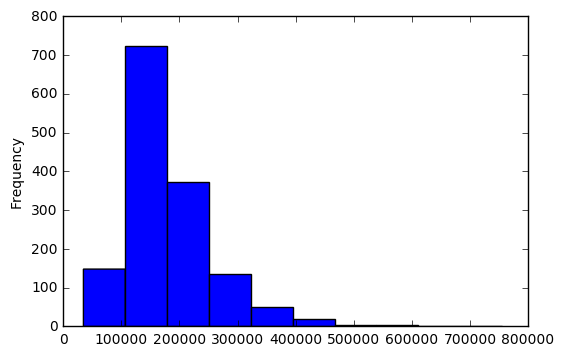

In [3]:
%matplotlib inline



train_set['SalePrice'].plot.hist()

<h4>As we can see we have both categorical and nuerical columns and some null values:<h4>
we append the test set to trian set to proccess all data:

In [4]:
df = pd.concat([train_set ,test_set], axis=0, ignore_index=True)


<h2>Data Processing:</h2>

<h3>first filling the numerical null cells with the mean values of their columns:</h3>

In [5]:
df = df.fillna(df.mean())

numeric_feats = df.dtypes[df.dtypes != "object"].index
cat_feats = df.dtypes[df.dtypes=="object"].index
    

<h3>Rescaling numerical features:</h3>

In [6]:
from sklearn.preprocessing import MinMaxScaler


min_max =  MinMaxScaler()
min_max.fit(df[numeric_feats]) 

normalized_numfeats = min_max.transform(df[numeric_feats]) 



<h3>Encoding Categorical columns</h3>

In [7]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


label_enc = LabelEncoder()  

#first transfroming the categorical strings to numbers:

df[cat_feats] = df[cat_feats].fillna("NA")

for column in df[cat_feats]:
    label_enc.fit(df[column]) 
    df[column]=label_enc.transform(df[column])

    
onehot_enc = OneHotEncoder(sparse=False)

onehot_enc.fit(df[cat_feats]) 

encoded_cat_feats = onehot_enc.transform(df[cat_feats]) 


<h3>Combining the categorical and numerical columns back together:</h3>

In [8]:
data = np.concatenate((encoded_cat_feats , normalized_numfeats ), axis=1)

data.shape

(2919, 313)

<h3>Slicing out the train set out to train </h3>

In [9]:
number_of_samples = len(train_set)



target = data[0:number_of_samples,-1]
samples = data[0:number_of_samples ,:-1]



train_length = int(number_of_samples*0.7)


train_target = target[0:train_length]
print(train_target.shape)
train_samples = samples[:train_length,:]
print(train_samples.shape)
test_target = target[train_length:]
print(test_target.shape)
test_samples = samples[train_length:,:]
print(test_samples.shape)


number_of_samples

(1021,)
(1021, 312)
(439,)
(439, 312)


1460

<h3>Using Linear Regression to train the data</h3>

100.0


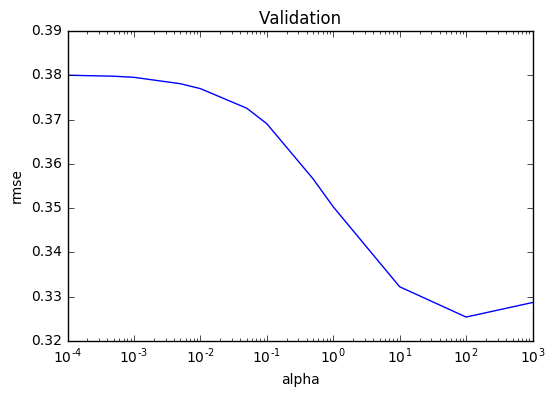

In [10]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model,x_c, y_c, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)


y_c = train_target
x_c = train_samples

alphas = [0.0001,0.0005,0.001,0.005,0.01,0.05, 0.1,0.5,1,10,100,1000]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]


%matplotlib inline

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation" , logx=True)
plt.xlabel("alpha")
plt.ylabel("rmse")

print(cv_ridge.argmin())

In [12]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

clf = Ridge(alpha = cv_ridge.argmin())
clf.fit(train_samples,train_target)

y_pred = clf.predict(test_samples)
y_test = test_target

print("Ridge score on training set: ", rmse(y_test, y_pred))

Ridge score on training set:  0.331481024555
